# EDA Notebook for Flask Visuals
Explore the data to find interesting visuals to display on Flask app.

In [106]:
# import libraries
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sqlite3

import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

In [107]:
# load data
# connect to the database
conn = sqlite3.connect('../data/DisasterResponse.db')

# run a query
df = pd.read_sql('SELECT * FROM disaster_response_messages', conn)

In [108]:
df.shape

(26216, 40)

In [109]:
df.head(2)

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


## Graph 1: Top Categories

In [110]:
category_names = df.columns[4:].tolist()
category_names

['related',
 'request',
 'offer',
 'aid_related',
 'medical_help',
 'medical_products',
 'search_and_rescue',
 'security',
 'military',
 'child_alone',
 'water',
 'food',
 'shelter',
 'clothing',
 'money',
 'missing_people',
 'refugees',
 'death',
 'other_aid',
 'infrastructure_related',
 'transport',
 'buildings',
 'electricity',
 'tools',
 'hospitals',
 'shops',
 'aid_centers',
 'other_infrastructure',
 'weather_related',
 'floods',
 'storm',
 'fire',
 'earthquake',
 'cold',
 'other_weather',
 'direct_report']

In [111]:
df.iloc[:, 4:].sum().sort_values(ascending=False).head(10)

related            20282
aid_related        10860
weather_related     7297
direct_report       5075
request             4474
other_aid           3446
food                2923
earthquake          2455
storm               2443
shelter             2314
dtype: int64

In [112]:
top_10_categories_counts = df.iloc[:, 4:].sum().sort_values(ascending=False).head(10)

In [113]:
# create a bar plot of the top 10 categories
fig = px.bar(x=top_10_categories_counts.index, y=top_10_categories_counts.values,
                labels={'x': 'Category', 'y': 'Count'},
                title='Top 10 disaster message categories')
fig.show()
                            

In [114]:
# ! pip install nbformat

## Graph 2: Top words in messages

In [115]:
from models.train_classifier import tokenize as tkn

In [116]:
# make a list of all words in the messages column
all_words = []
for message in df['message']:
    all_words.extend(tkn(message))

In [117]:
# get the top 10 words 
top_10_words = pd.Series(all_words).value_counts(ascending=False).head(10)
top_10_words

water         3045
people        3013
help          2848
food          2793
need          2752
please        2065
say           1851
earthquake    1796
like          1535
would         1491
dtype: int64

In [118]:
# visualize the top 10 words
fig = px.bar(x=top_10_words.index, y=top_10_words.values,
                labels={'x': 'Word', 'y': 'Count'},
                title='Top 10 words in the disaster messages')
fig.show()

In [119]:
# visualize the top 10 words with bubble chart
fig = px.scatter(top_10_words, x=top_10_words.index, y=top_10_words.values,
                    size=top_10_words.values, size_max=60,
                    labels={'x': 'Word', 'y': 'Count'},
                    title='Top 10 words in the disaster messages')
fig.show()

In [120]:
# ! pip install wordcloud

(-0.5, 799.5, 399.5, -0.5)

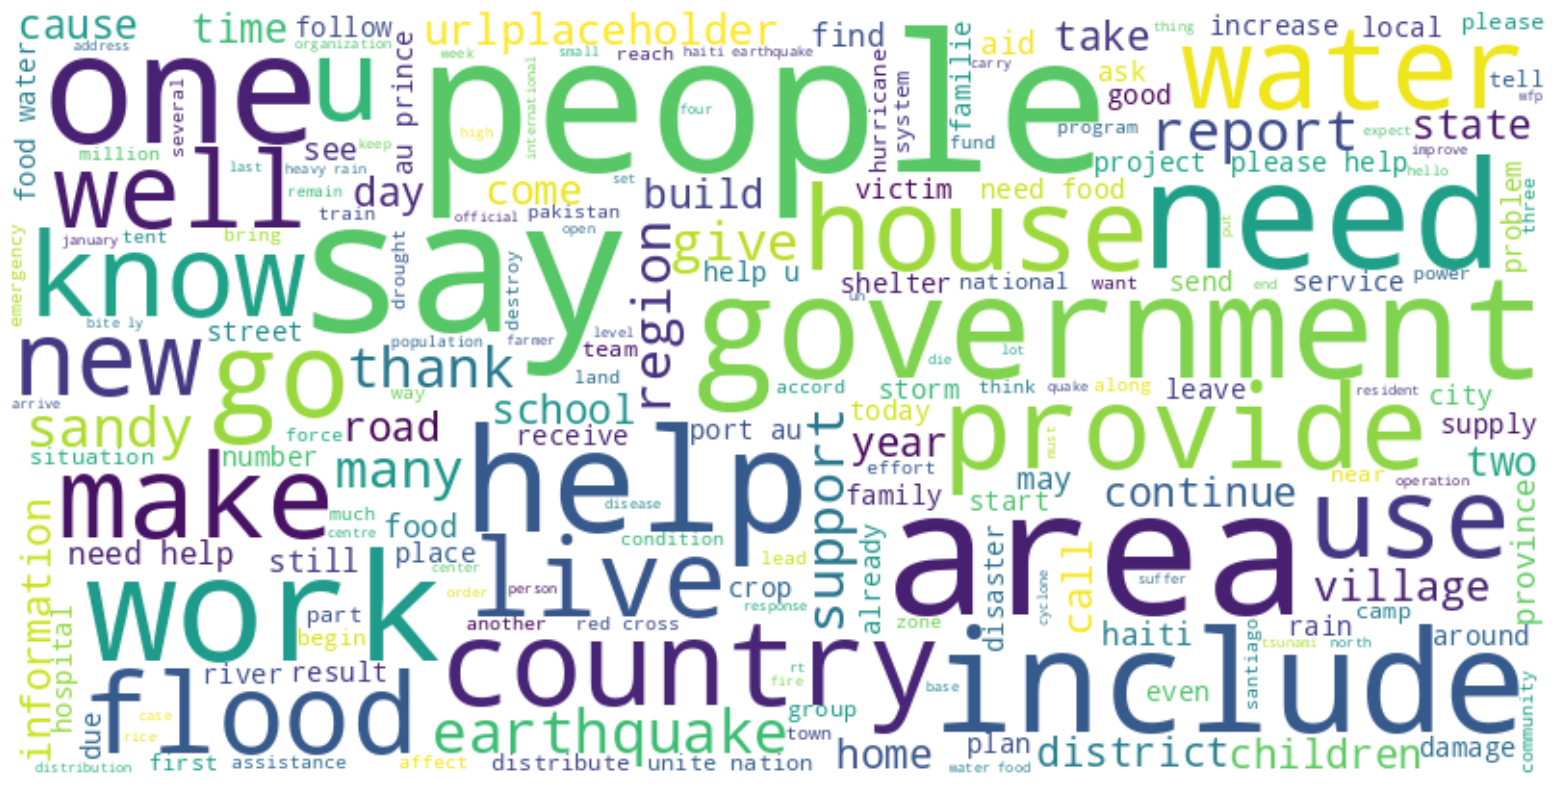

In [121]:
# visualize the top 10 words using a word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# combine all the words into one string
all_words_str = ' '.join(all_words)

# create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white',
                        stopwords=set(STOPWORDS), max_words=200,
                        max_font_size=100, random_state=42).generate(all_words_str)

# plot the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')